## **DATA ANALYSIS IN PYTHON - BLINKIT ANALYSIS**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:\\Users\\praag\\Desktop\\blinkit\\blinkit_products.csv")

In [4]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [5]:
df.shape

(8523, 12)

In [6]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [7]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [8]:
for i in df.columns:
    print(df[i].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']
['FDX32' 'NCB42' 'FDR28' ... 'FDU60' 'NCX53' 'FDE52']
['Fruits and Vegetables' 'Health and Hygiene' 'Frozen Foods' 'Canned'
 'Soft Drinks' 'Household' 'Snack Foods' 'Meat' 'Breads' 'Hard Drinks'
 'Others' 'Dairy' 'Breakfast' 'Baking Goods' 'Seafood' 'Starchy Foods']
[2012 2022 2016 2014 2015 2020 2011 2018 2017]
['OUT049' 'OUT018' 'OUT046' 'OUT013' 'OUT045' 'OUT017' 'OUT010' 'OUT027'
 'OUT035' 'OUT019']
['Tier 1' 'Tier 3' 'Tier 2']
['Medium' 'Small' 'High']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
[0.1000135  0.00859605 0.02589649 ... 0.03470581 0.02757094 0.10771483]
[15.1   11.8   13.85  12.15  19.6    8.89  19.7   20.75     nan 18.85
 17.1   16.35  20.25  17.85  19.2   12.1    6.85  17.25  16.    13.35
  6.695 16.6    6.92   5.82  14.8   10.1    7.67  15.6    9.31  13.15
 16.25   6.75  10.5    9.3   18.1   17.5    7.975 10.     8.93   7.3
  7.93  15.35  19.35   9.5    5.88   8.88  10.6    6.13   6.38   

In [9]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})

In [10]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [11]:
for i in df.columns:
    print(df[i].isna().sum())

0
0
0
0
0
0
0
0
0
1463
0
0


## KPI REQUIREMENT

In [13]:
total_sales=df['Sales'].sum()
total_sales

1201681.4928

In [14]:
avg_sales=df['Sales'].mean()
avg_sales

140.99278338613163

In [15]:
num_items=df['Sales'].count()

In [16]:
avg_rating=df['Rating'].mean()

In [17]:
print(f"Total Sales : ${total_sales: ,.1f}") #print till 1 decimal places

Total Sales : $ 1,201,681.5


## CHARTS REQUIREMENTS

In [19]:
#total sales by fat content

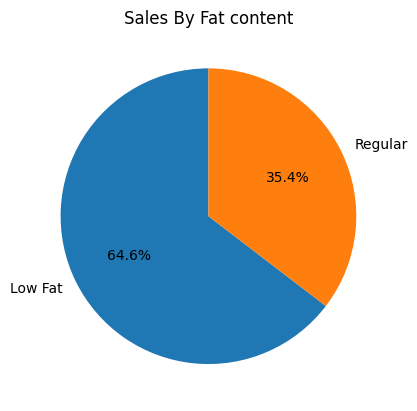

In [20]:
sales_by_fat= df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat, labels= sales_by_fat.index, autopct='%.1f%%', startangle=90)
#autopct to add percentage of share
plt.title('Sales By Fat content')
plt.show()

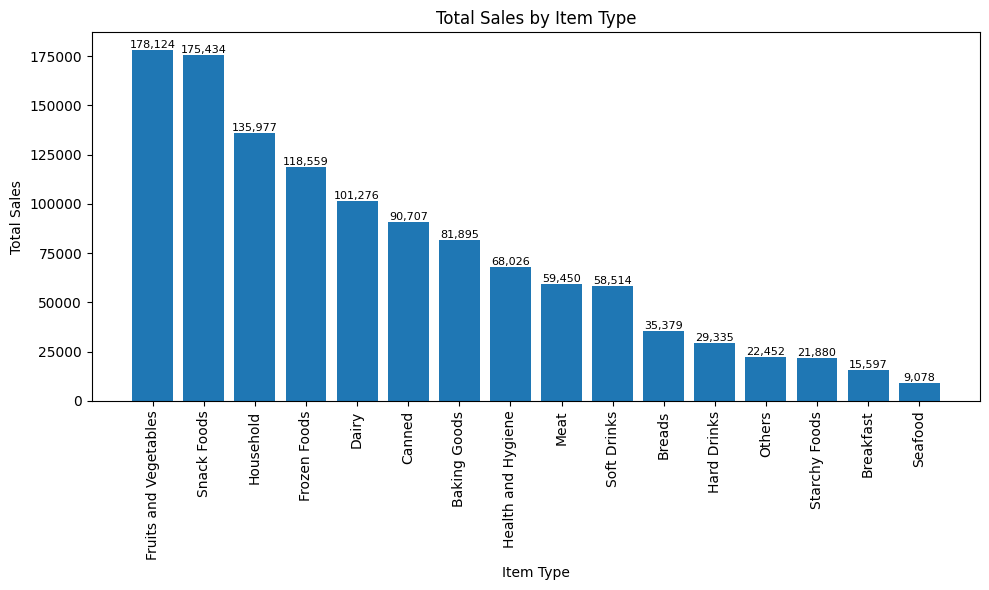

In [21]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')
 #to put values above bars
for  bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


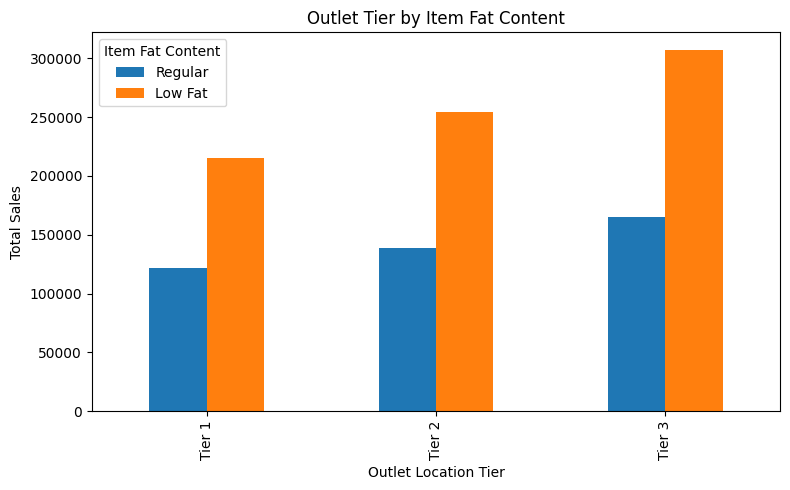

In [22]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
#unstack to not overlap each other
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8, 5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()


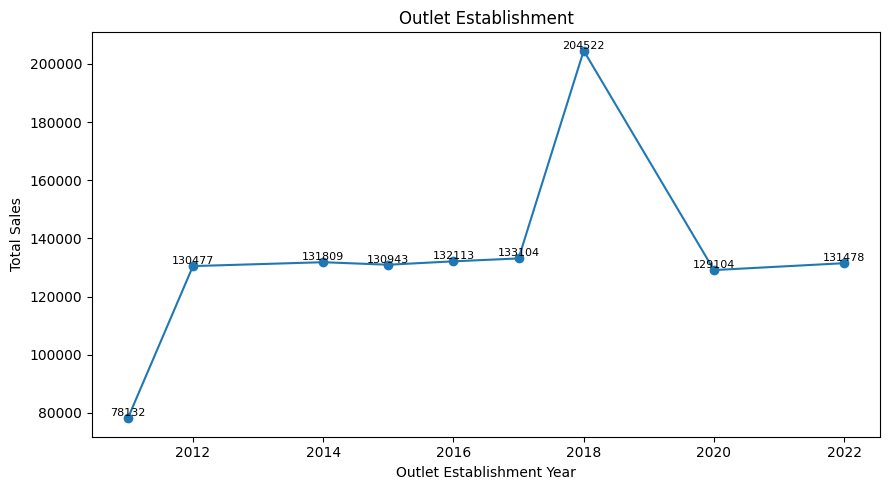

In [23]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
#.index for x axis .values for y axis

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

#to put data labels
for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


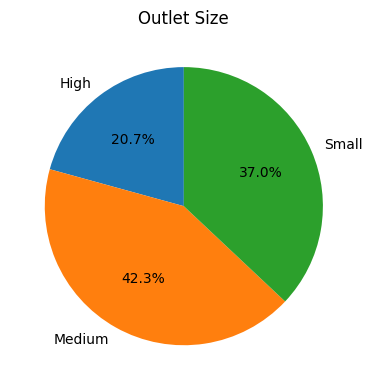

In [24]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4, 4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()


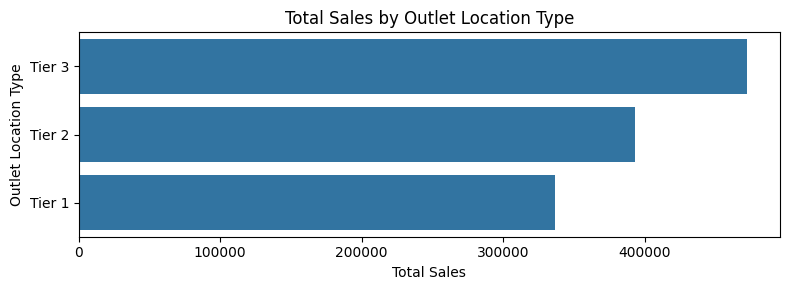

In [25]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8, 3))  # Smaller height, enough width
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.tight_layout()  # Ensures layout fits without scroll
plt.show()


##Break


In [62]:
#pip install mysql-connector-python pandas
!pip install sqlalchemy mysql-connector-python


In [52]:
import mysql.connector

In [74]:

from sqlalchemy import create_engine
# 1. Connect to MySQL

host="localhost"
username="root"
password="rajaravarpra"
database="blinkit_data"

engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}/{database}")
# 2. Fetch data
query = "SELECT * FROM blinkit_data"  # Replace with actual table

df = pd.read_sql(query, con=engine)
# 3. Export to CSV
print(df)
df.to_csv("report.csv", index=False)




     Item_Fat_Content Item_Identifier              Item_Type  \
0             Regular           FDX32  Fruits and Vegetables   
1             Low Fat           NCB42     Health and Hygiene   
2             Regular           FDR28           Frozen Foods   
3             Regular           FDL50                 Canned   
4             Low Fat           DRI25            Soft Drinks   
...               ...             ...                    ...   
8518          Low Fat           NCT53     Health and Hygiene   
8519          Low Fat           FDN09            Snack Foods   
8520          Low Fat           DRE13            Soft Drinks   
8521          Regular           FDT50                  Dairy   
8522          Regular           FDM58            Snack Foods   

      Outlet_Establishment_Year Outlet_Identifier Outlet_Location_Type  \
0                          2012            OUT049               Tier 1   
1                          2022            OUT018               Tier 3   
2        